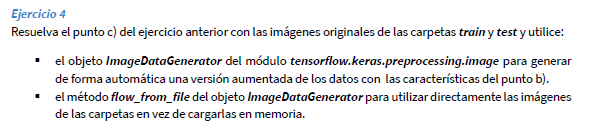

## Cargo datos e importo librerias

In [17]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## Construyo modelo

In [26]:
# constantes para arquitectura, generación datos y entrenamiento/validacion
EPOCAS = 30
LOTES  = 32
IMG_SIZE = (64, 64, 1)
N_CLASSES = 6
PACIENCIA = 10

# %% construye le modelo

def build_model(img_size, classes):
    model = Sequential()

    model.add(InputLayer(input_shape=img_size))
    model.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model

# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 31, 31, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

## Las imagenes deben estar en carpetas por clase

In [27]:
import os
import shutil

# Ruta a la carpeta donde están todas las imágenes
source_dir = 'C:/Users/Peter/Desktop/Facu/Deep Learning/Datos-Fuentes/Datos/Fingers/train'  # Reemplaza con la ruta correcta
# Ruta donde se crearán las subcarpetas por clase
dest_dir = 'C:/Users/Peter/Desktop/Facu/Deep Learning/Datos-Fuentes/Datos/FingersClass/train'  # Reemplaza con la ruta donde quieres copiar las imágenes

# Crear las carpetas de destino si no existen
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Iterar sobre cada imagen en la carpeta
for img_file in os.listdir(source_dir):
    if img_file.endswith('.png'):  # Filtrar solo archivos PNG
        # Obtener la clase desde la posición -6 del nombre del archivo
        class_name = img_file[-6]
        
        # Ruta de la carpeta destino para esa clase
        class_folder = os.path.join(dest_dir, class_name)
        
        # Si la carpeta no existe, crearla
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)
        
        # Ruta completa del archivo original
        source_path = os.path.join(source_dir, img_file)
        
        # Ruta completa del destino (carpeta de clase)
        dest_path = os.path.join(class_folder, img_file)
        
        # Copiar la imagen al directorio correspondiente
        shutil.copy(source_path, dest_path)

print("Imágenes copiadas a las carpetas de clase.")


Imágenes copiadas a las carpetas de clase.


## Genero imagenes

In [28]:
# construye un generador de imagenes para dividir en entrenamiento y validación
# aplicando transformaciones para aumentar los datos
data_train_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=45,         # rotacion
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="nearest"
    )

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=DATOS_DIR+'FingersClass/train',
            class_mode='categorical',
            batch_size=LOTES,
            color_mode='grayscale',
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=DATOS_DIR+'FingersClass/train',
            class_mode='categorical',
            batch_size=LOTES,
            color_mode='grayscale',
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )


data_test_generator = ImageDataGenerator(
    rotation_range=45,         # rotacion
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="nearest"
    )

test_iter = data_test_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=DATOS_DIR+'FingersClass/test',
            class_mode='categorical',
            color_mode='grayscale',
            batch_size=LOTES
            )

Found 14400 images belonging to 6 classes.
Found 3599 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


## Entreno modelo

In [29]:
# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss',
                           patience=PACIENCIA,
                           restore_best_weights=True)

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 10,
    epochs=EPOCAS,
    callbacks=[early_stop])

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 60s 131ms/step - accuracy: 0.3708 - loss: 1.5707 - val_accuracy: 0.6125 - val_loss: 1.0561
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6671 - loss: 0.9248 - val_accuracy: 0.8406 - val_loss: 0.6414
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8258 - loss: 0.6298 - val_accuracy: 0.8875 - val_loss: 0.4873
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8937 - loss: 0.4467 - val_accuracy: 0.9156 - val_loss: 0.3409
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9382 - loss: 0.3032 - val_accuracy: 0.9656 - val_loss: 0.2147
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9470 - loss: 0.2462 - val_accuracy: 0.9656 - val_loss: 0.1575
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9588 - loss: 0.1954 - val_accuracy: 0.9594 - val_loss: 0.1739
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9632 - loss: 0.1708 - val_ac

## Testeo modelo


Efectividad del modelo con datos de entrenamiento:  97.90%
Efectividad del modelo con datos de Validación...:  98.00%
Efectividad del modelo con datos de Prueba.......:  97.81%


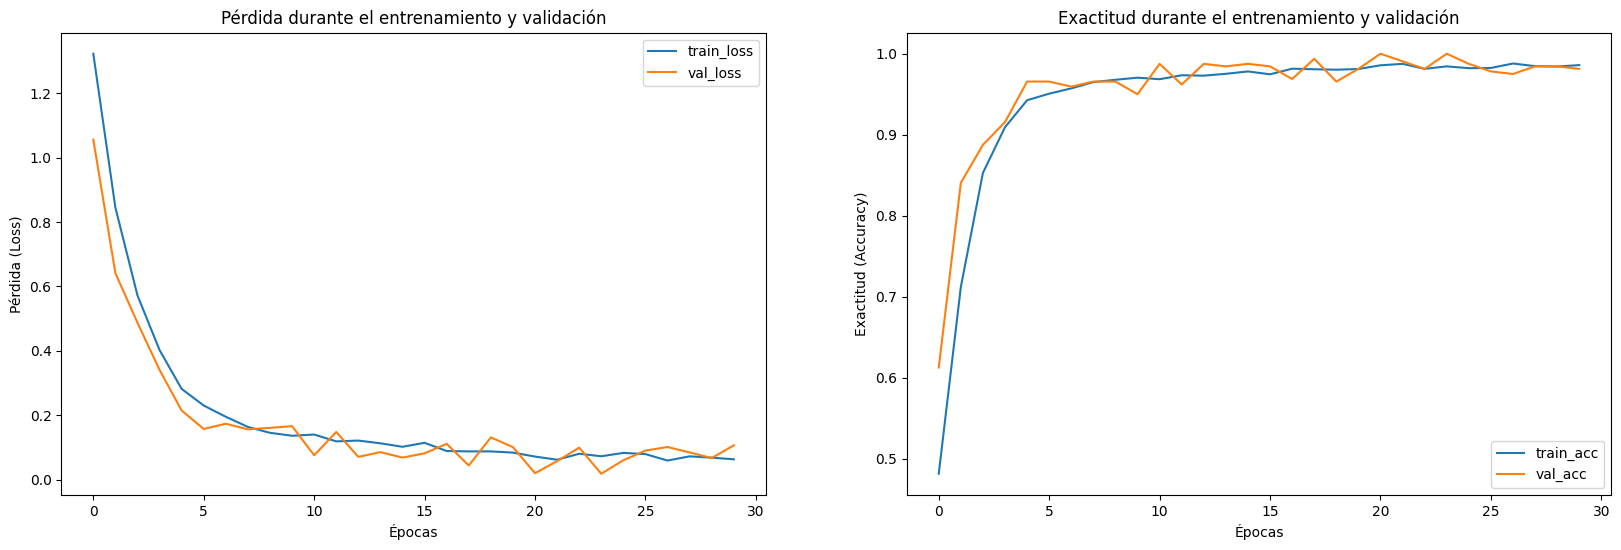

<Figure size 640x480 with 0 Axes>

: 

In [30]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[0].set_title("Pérdida durante el entrenamiento y validación")  # Título del gráfico
axs[0].set_xlabel("Épocas")  # Etiqueta del eje X
axs[0].set_ylabel("Pérdida (Loss)")  # Etiqueta del eje Y
axs[0].legend(loc="upper right")  # Muestra la leyenda en la esquina superior derecha

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")
axs[1].set_title("Exactitud durante el entrenamiento y validación")  # Título del gráfico
axs[1].set_xlabel("Épocas")  # Etiqueta del eje X
axs[1].set_ylabel("Exactitud (Accuracy)")  # Etiqueta del eje Y
axs[1].legend(loc="lower right")  # Muestra la leyenda en la esquina inferior derecha


# %% evalua el modelo para entrenamiento
pred = model.evaluate(train_iter, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(valid_iter, verbose=0)
print("Efectividad del modelo con datos de Validación...: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(test_iter, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))
